# Bibliotecas

In [63]:
import os
import scipy

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint

from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

# Carregando Dados

In [13]:
PATH_DATA = 'data'

In [14]:
df_com_ataque = pd.read_csv(
    os.path.join(PATH_DATA, 'arquivo_com_ataque.csv')
)

In [15]:
df_com_ataque.head(2)

,hora,ip,metodo,protocolo,hostname,uri,querystring,status_code,f0_,useragent,tamanho_request,tamanho_resposta,organizacao,pais,cidade,cookie_sessao,fingerprint1,fingerprint2,fingerprint3
0,2024-05-15 15:59:56 UTC,3.16.1a6931d1bd6093f2d7bd86a22fc657b9bba9a595b...,GET,HTTP/2.0,cab18057667df4595131dbc97b20b663c54b070d23e4e1...,/f276ac316f69b3f71eda737633acf69638452b0aee48a...,NaN,200,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_0...,196,NaN,AS16509 AMAZON-02,US,Columbus,1e0a93baad5dd480f42d5b95a51be36c0f86543e36c689...,b2bcc0e205d8ecf9af803794fb0075443f770e6849ee67...,844de68e6dea184cbfafec6f2dd46f1e82d3ff336b723a...,16af3145e3eee586af1ab917de45236567be83c62d0e45...
1,2024-05-15 15:59:33 UTC,177.91.6661493bb44e1df9a8bd020769c24a48a092a24...,GET,HTTP/2.0,cab18057667df4595131dbc97b20b663c54b070d23e4e1...,/8a5edab282632443219e051e4ade2d1d5bbc671c78105...,NaN,200,NaN,Mozilla/5.0 (iPhone; CPU iPhone OS 17_4_1 like...,274,NaN,AS263432 CORPORATIVA TELECOMUNICACOES EIRELI ME,BR,Barueri,4913706deec9c6962172970ddb26cec317abc6d2157887...,de928d0d6dff7b9793edb5c1522b6580b0b3e4ba0faff8...,c523025a20e743aaee34dd69e3c92f9e505d2d2ab4fedb...,d1ec27c5ea84f9aaa2fde750e00ed145404333f66a2431...


# Análise Descritiva Básica e Estatísticas

In [16]:
df_com_ataque.shape

(348864, 19)

In [17]:
df_com_ataque.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348864 entries, 0 to 348863
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   hora              348864 non-null  object 
 1   ip                348864 non-null  object 
 2   metodo            348864 non-null  object 
 3   protocolo         348864 non-null  object 
 4   hostname          348864 non-null  object 
 5   uri               348864 non-null  object 
 6   querystring       83233 non-null   object 
 7   status_code       348864 non-null  int64  
 8   f0_               313136 non-null  object 
 9   useragent         347372 non-null  object 
 10  tamanho_request   348864 non-null  int64  
 11  tamanho_resposta  256033 non-null  float64
 12  organizacao       348864 non-null  object 
 13  pais              348864 non-null  object 
 14  cidade            325891 non-null  object 
 15  cookie_sessao     348864 non-null  object 
 16  fingerprint1      34

In [18]:
df_com_ataque.describe()

,status_code,tamanho_request,tamanho_resposta
count,348864.000000,348864.000000,2.560330e+05
mean,213.450729,1048.825915,5.453435e+04
std,57.608418,11088.762844,1.405912e+05
min,200.000000,10.000000,0.000000e+00
25%,200.000000,45.000000,1.218000e+03
50%,200.000000,77.000000,1.139000e+04
75%,200.000000,371.000000,4.851200e+04
max,502.000000,503770.000000,6.044766e+06


In [19]:
df_com_ataque.head(2)

,hora,ip,metodo,protocolo,hostname,uri,querystring,status_code,f0_,useragent,tamanho_request,tamanho_resposta,organizacao,pais,cidade,cookie_sessao,fingerprint1,fingerprint2,fingerprint3
0,2024-05-15 15:59:56 UTC,3.16.1a6931d1bd6093f2d7bd86a22fc657b9bba9a595b...,GET,HTTP/2.0,cab18057667df4595131dbc97b20b663c54b070d23e4e1...,/f276ac316f69b3f71eda737633acf69638452b0aee48a...,NaN,200,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_0...,196,NaN,AS16509 AMAZON-02,US,Columbus,1e0a93baad5dd480f42d5b95a51be36c0f86543e36c689...,b2bcc0e205d8ecf9af803794fb0075443f770e6849ee67...,844de68e6dea184cbfafec6f2dd46f1e82d3ff336b723a...,16af3145e3eee586af1ab917de45236567be83c62d0e45...
1,2024-05-15 15:59:33 UTC,177.91.6661493bb44e1df9a8bd020769c24a48a092a24...,GET,HTTP/2.0,cab18057667df4595131dbc97b20b663c54b070d23e4e1...,/8a5edab282632443219e051e4ade2d1d5bbc671c78105...,NaN,200,NaN,Mozilla/5.0 (iPhone; CPU iPhone OS 17_4_1 like...,274,NaN,AS263432 CORPORATIVA TELECOMUNICACOES EIRELI ME,BR,Barueri,4913706deec9c6962172970ddb26cec317abc6d2157887...,de928d0d6dff7b9793edb5c1522b6580b0b3e4ba0faff8...,c523025a20e743aaee34dd69e3c92f9e505d2d2ab4fedb...,d1ec27c5ea84f9aaa2fde750e00ed145404333f66a2431...


In [20]:
df_com_ataque.nunique()

hora                  7200
ip                   10122
metodo                   5
protocolo                3
hostname                 3
uri                  24666
querystring          23009
status_code             14
f0_                   3635
useragent             1868
tamanho_request       4972
tamanho_resposta     12215
organizacao           1937
pais                   105
cidade                1531
cookie_sessao       128081
fingerprint1         12195
fingerprint2           291
fingerprint3           173
dtype: int64

> Informações categóricas com poucas categorias: ['metodo', 'protocolo', 'hostname', 'status_code', 'pais']

> Informações numéricas: ['status_code', 'tamanho_request', 'tamanho_resposta']

In [45]:
cat_cols = ['metodo', 'protocolo', 'hostname', 'status_code', 'pais']
num_cols = ['status_code', 'tamanho_request', 'tamanho_resposta']

# Análise Exploratória de Dados

## Análise de Variáveis Numéricas

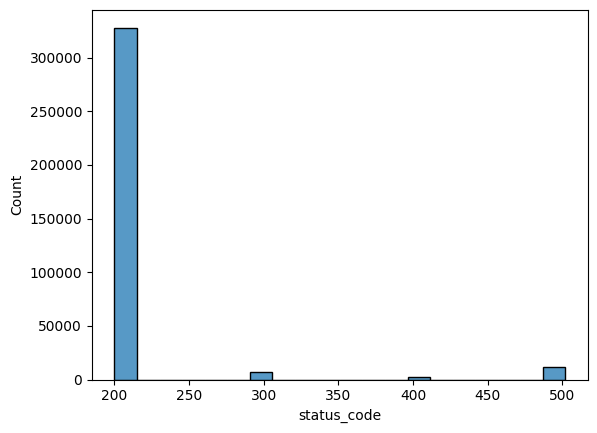

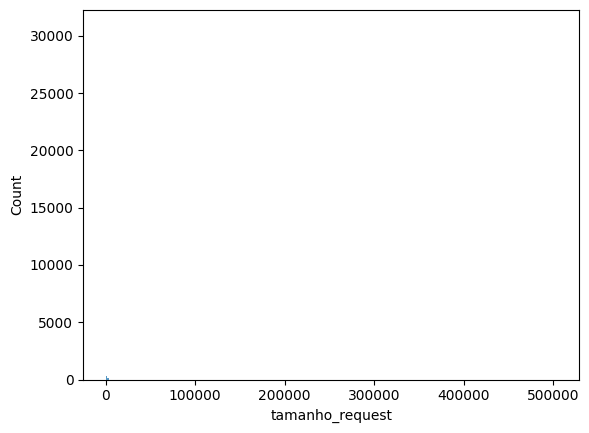

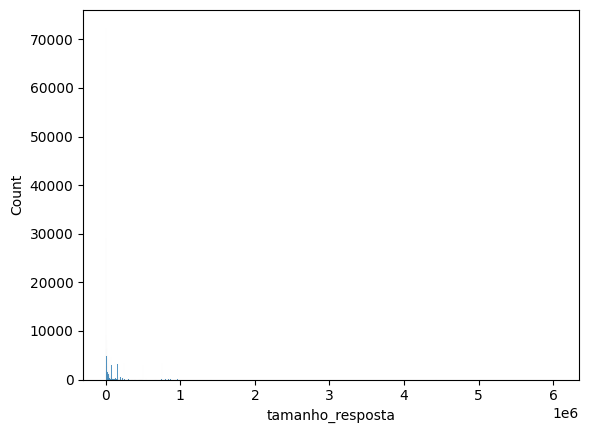

In [21]:
for col in num_cols:
    sns.histplot(df_com_ataque, x=col)
    plt.show()

## Análise de Variáveis Categóricas

In [23]:
df_com_ataque['hostname'] = df_com_ataque['hostname'].str[:3]

cats = {
    col: df_com_ataque[col].unique().tolist()
    for col in cat_cols
}

pprint(cats)

{'hostname': ['cab', 'ea6', '145'],
 'metodo': ['GET', 'POST', 'HEAD', 'XCGFULLBAN', 'OPTIONS'],
 'pais': ['US',
          'BR',
          'AR',
          'HN',
          'BG',
          'NL',
          'IQ',
          'GB',
          'PL',
          'PT',
          'FR',
          'DK',
          'VN',
          'EG',
          'PK',
          'RU',
          'NO',
          'MZ',
          'LB',
          'ES',
          'DZ',
          'HK',
          'FI',
          'CA',
          'IL',
          'SG',
          'DE',
          'AT',
          'CN',
          'HR',
          'IE',
          'SE',
          'ID',
          'LY',
          'UA',
          'JP',
          'CY',
          'IN',
          'AE',
          'VE',
          'HU',
          'CZ',
          'KR',
          'KZ',
          'ZA',
          'AM',
          'GR',
          'BY',
          'MX',
          'CO',
          'TH',
          'EC',
          'BW',
          'MY',
          'AU',
          'KH',
       

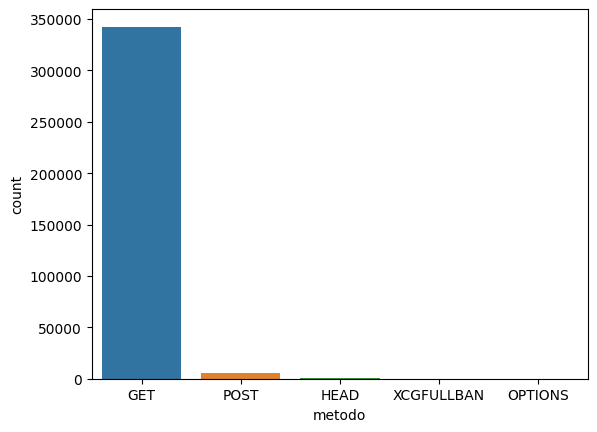

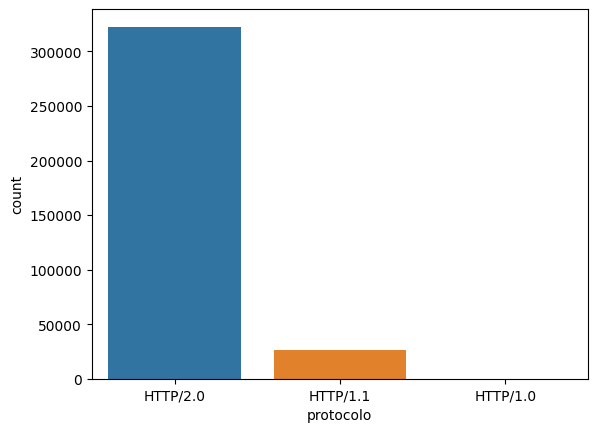

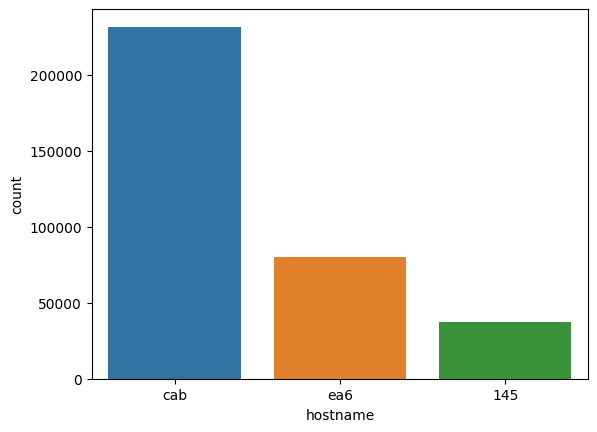

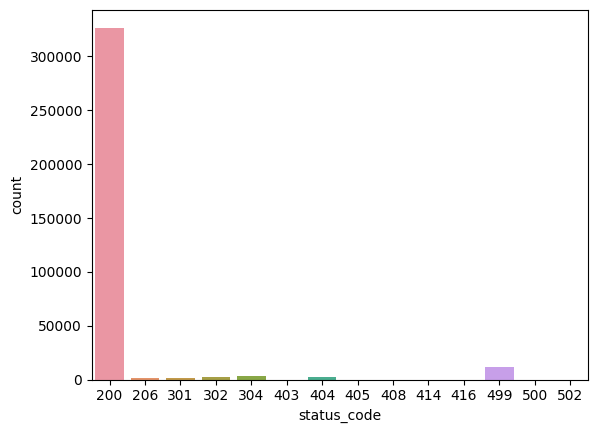

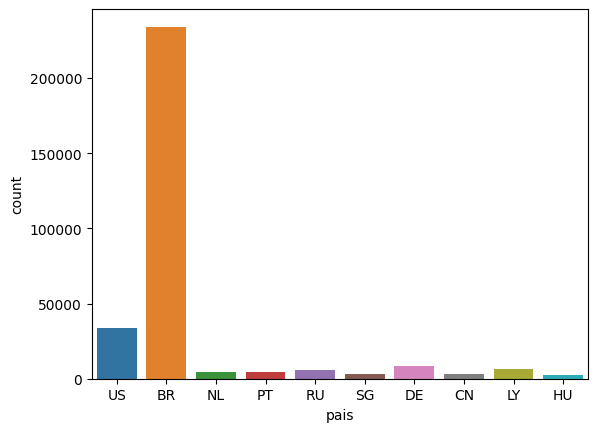

In [43]:
for col in cats:
    if col=='pais':
        maiores_10 = df_com_ataque.groupby('pais')['pais'].count().sort_values(ascending=False).keys()[:10].tolist()
        sns.countplot(
            data=df_com_ataque[df_com_ataque.pais.isin(maiores_10)],
            x=col
        )
    else:
        sns.countplot(data=df_com_ataque, x=col)
    plt.show()

## Análise Temporal

In [59]:
df_tmp = pd.read_csv(
    os.path.join(PATH_DATA, 'arquivo_com_ataque.csv'),
    parse_dates=["hora"]
)
df_tmp['row_id'] = [i for i in range(df_tmp.shape[0])]

In [60]:
num_cols

['status_code', 'tamanho_request', 'tamanho_resposta']

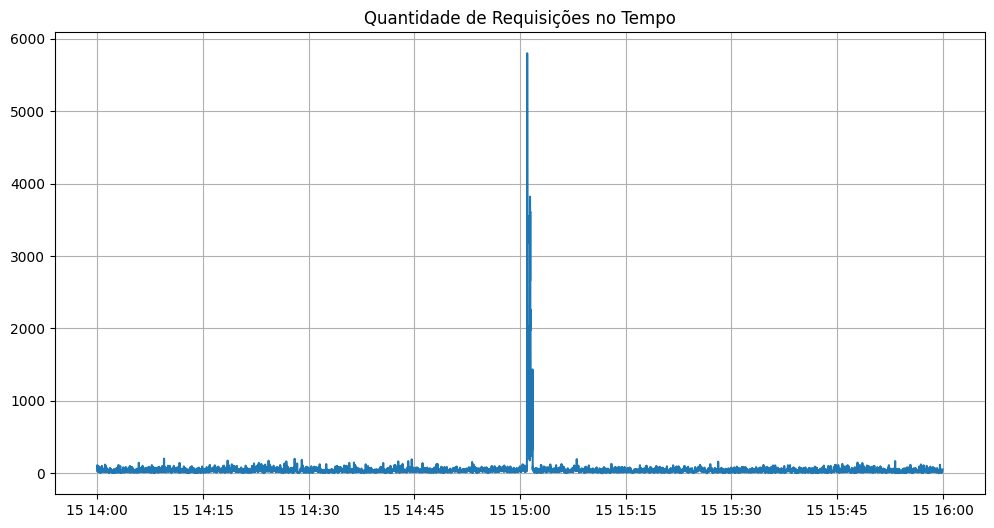

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(df_tmp.groupby('hora')[['row_id']].count().row_id)
plt.title("Quantidade de Requisições no Tempo")
plt.grid(True)
plt.show()

In [64]:
def plotMovingAverage(
    series, window, plot_intervals=False, scale=1.96, plot_anomalies=False
):

    """
        series - dataframe with timeseries
        window - rolling window size
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15, 5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")

        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series < lower_bond] = series[series < lower_bond]
            anomalies[series > upper_bond] = series[series > upper_bond]
            plt.plot(anomalies, "ro", markersize=10)

    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

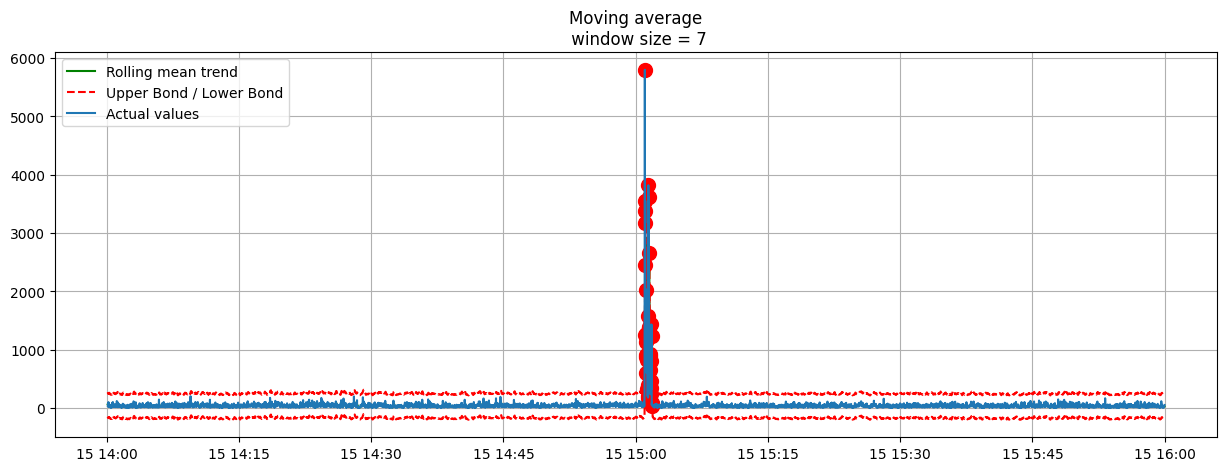

In [69]:
plotMovingAverage(
    series=df_tmp.groupby('hora')[['row_id']].count(),
    window=7,
    plot_intervals=True,
    plot_anomalies=True
)

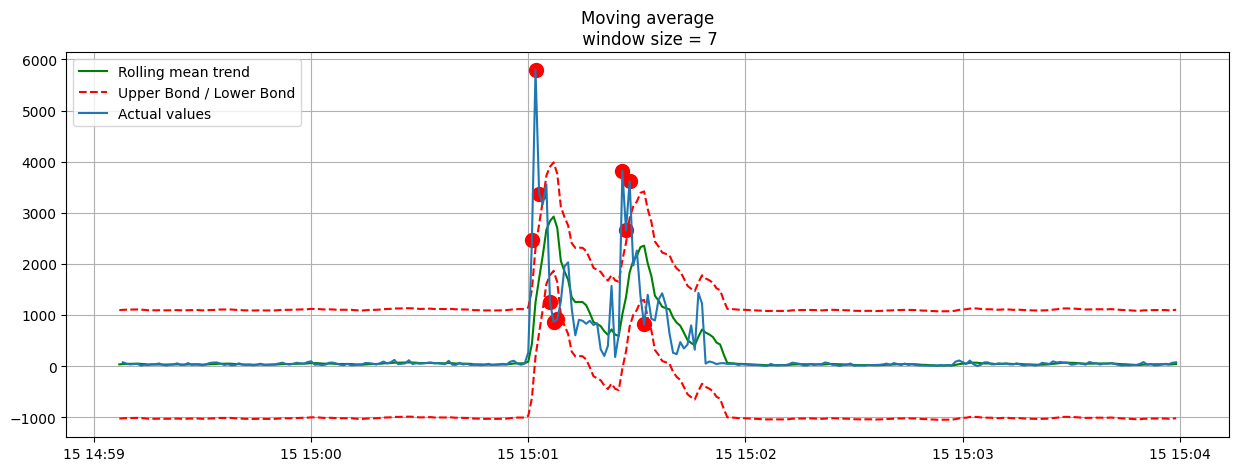

In [76]:
plotMovingAverage(
    series=df_tmp[
        (df_tmp.hora > '2024-05-15 14:59') & (df_tmp.hora < '2024-05-15 15:04')
    ].groupby('hora')[['row_id']].count(),
    window=7,
    plot_intervals=True,
    plot_anomalies=True
)